La ciencia de datos es una herramienta poderosa que se puede utilizar en el trading para analizar datos financieros y tomar decisiones informadas. Aquí hay una guía básica sobre cómo puedes aplicar la ciencia de datos en el trading:



In [28]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import seaborn as sns
import numpy as np



# 1. Obtención de Datos:

Fuentes de Datos: Puedes obtener datos financieros de diversas fuentes, como bolsas de valores, proveedores de datos financieros, APIs, etc.

Tipos de Datos: Los datos pueden incluir precios de acciones, volúmenes de transacciones, indicadores técnicos, datos macroeconómicos, noticias, etc.


In [29]:


# Definir los símbolos de los activos
tickers = ['^GSPC','MSFT', 'JNJ', 'MA', 'PEP', 'WMT', 'MCD']


# Definir los nombres de los activos en la cartera
nombres_activos = [ 'Johnson & Johnson (JNJ)', 'Mastercard (MA)', 'McDonalds (MCD)','Microsoft (MSFT)',
                   'PepsiCo (PEP)', 'Walmart (WMT)', 'S&P500 (^GSPC)']

# Definir el rango de fechas
start_date = '2023-01-01'
end_date = '2023-10-27'

# Obtener los datos de los activos
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data

[*********************100%%**********************]  7 of 7 completed


,JNJ,MA,MCD,MSFT,PEP,WMT,^GSPC
Date,,,,,,,
2023-01-03,174.326996,344.696838,260.026855,237.956345,175.733231,141.967941,3824.139893
2023-01-04,176.224930,352.996216,260.085938,227.547363,175.302246,142.126114,3852.969971
2023-01-05,174.923767,349.636688,257.892212,220.803360,173.470566,141.641693,3808.100098
2023-01-06,176.342331,366.033386,265.083221,223.405594,177.388596,145.111801,3895.080078
2023-01-09,171.773560,369.318695,262.899353,225.580765,175.654877,143.302582,3892.090088
...,...,...,...,...,...,...,...
2023-10-20,153.000000,384.410004,258.109985,326.670013,160.000000,158.759995,4224.160156
2023-10-23,151.389999,383.670013,254.750000,329.320007,160.080002,161.009995,4217.040039
2023-10-24,151.229996,386.910004,257.269989,330.529999,162.190002,163.250000,4247.680176



# 2. Preprocesamiento de Datos:

Limpieza de Datos: Elimina datos faltantes o inconsistentes.

Normalización/Estandarización: Asegúrate de que los datos estén en una escala uniforme para facilitar el análisis.

Transformación de Datos: Puedes aplicar técnicas como el logaritmo o la diferenciación para estabilizar series temporales.


In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
# Muestra las primeras filas del DataFrame (por defecto, las primeras 5)
data.head()


,JNJ,MA,MCD,MSFT,PEP,WMT,^GSPC
Date,,,,,,,
2023-01-03,174.326996,344.696838,260.026855,237.956345,175.733231,141.967941,3824.139893
2023-01-04,176.224930,352.996216,260.085938,227.547363,175.302246,142.126114,3852.969971
2023-01-05,174.923767,349.636688,257.892212,220.803360,173.470566,141.641693,3808.100098
2023-01-06,176.342331,366.033386,265.083221,223.405594,177.388596,145.111801,3895.080078
2023-01-09,171.773560,369.318695,262.899353,225.580765,175.654877,143.302582,3892.090088


In [32]:

# Muestra las ultimas filas del DataFrame (por defecto, las primeras 5)
data.tail()

,JNJ,MA,MCD,MSFT,PEP,WMT,^GSPC
Date,,,,,,,
2023-10-20,153.000000,384.410004,258.109985,326.670013,160.000000,158.759995,4224.160156
2023-10-23,151.389999,383.670013,254.750000,329.320007,160.080002,161.009995,4217.040039
2023-10-24,151.229996,386.910004,257.269989,330.529999,162.190002,163.250000,4247.680176
2023-10-25,151.570007,386.309998,258.029999,340.670013,162.350006,162.759995,4186.770020
2023-10-26,149.000000,364.589996,255.830002,327.890015,161.410004,161.770004,4137.229980


In [33]:

# Muestra un resumen estadístico de tus datos
data.describe()

,JNJ,MA,MCD,MSFT,PEP,WMT,^GSPC
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,160.252006,380.188735,276.442298,301.584406,177.418462,151.227609,4228.601994
std,6.332561,18.368537,13.683073,35.752236,8.230341,8.254323,201.502218
min,148.838226,343.175568,246.190002,220.803360,158.080002,135.413284,3808.100098
25%,155.958733,367.597496,263.774551,271.492935,171.976818,143.386616,4079.692566
50%,159.981674,378.218903,280.062454,316.945007,178.615891,151.636879,4201.750000
75%,163.716927,394.790756,288.405022,330.525055,183.116779,158.685871,4403.797607
max,176.342331,416.526184,296.814209,358.730469,193.398926,165.250000,4588.959961


In [34]:

# Muestra información sobre las columnas y los tipos de datos
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206 entries, 2023-01-03 to 2023-10-26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     206 non-null    float64
 1   MA      206 non-null    float64
 2   MCD     206 non-null    float64
 3   MSFT    206 non-null    float64
 4   PEP     206 non-null    float64
 5   WMT     206 non-null    float64
 6   ^GSPC   206 non-null    float64
dtypes: float64(7)
memory usage: 12.9 KB


In [35]:

# Muestra la cantidad de filas y columnas en el DataFrame
data.shape


(206, 7)

In [36]:

# Calcular los rendimientos diarios
returns = data.pct_change().dropna()

# Calcular la rentabilidad logarítmica
log_returns = returns.apply(lambda x: (1 + x).apply(lambda y: y if y > 0 else 1/y).apply(lambda z: z - 1))

# Calcular el rendimiento esperado
mean_returns = log_returns.mean()

# Mostrar la rentabilidad logarítmica y el rendimiento esperado para cada activo
print('Rentabilidad Logarítmica:')
log_returns.head()


Rentabilidad Logarítmica:


,JNJ,MA,MCD,MSFT,PEP,WMT,^GSPC
Date,,,,,,,
2023-01-04,0.010887,0.024077,0.000227,-0.043743,-0.002452,0.001114,0.007539
2023-01-05,-0.007384,-0.009517,-0.008435,-0.029638,-0.010449,-0.003408,-0.011646
2023-01-06,0.008110,0.046896,0.027884,0.011785,0.022586,0.024499,0.022841
2023-01-09,-0.025909,0.008975,-0.008238,0.009736,-0.009774,-0.012468,-0.000768
2023-01-10,-0.002392,0.000108,0.006211,0.007617,-0.008253,-0.000621,0.006978


In [37]:

print('Rendimiento Esperado:')
mean_returns


Rendimiento Esperado:


JNJ     -0.000709
MA       0.000338
MCD     -0.000040
MSFT     0.001703
PEP     -0.000368
WMT      0.000672
^GSPC    0.000420
dtype: float64


# 3. Análisis Exploratorio de Datos (EDA):

Utiliza técnicas de visualización y estadísticas descriptivas para entender los patrones y relaciones en tus datos. Esto puede incluir gráficos de líneas, histogramas, gráficos de dispersión, etc.



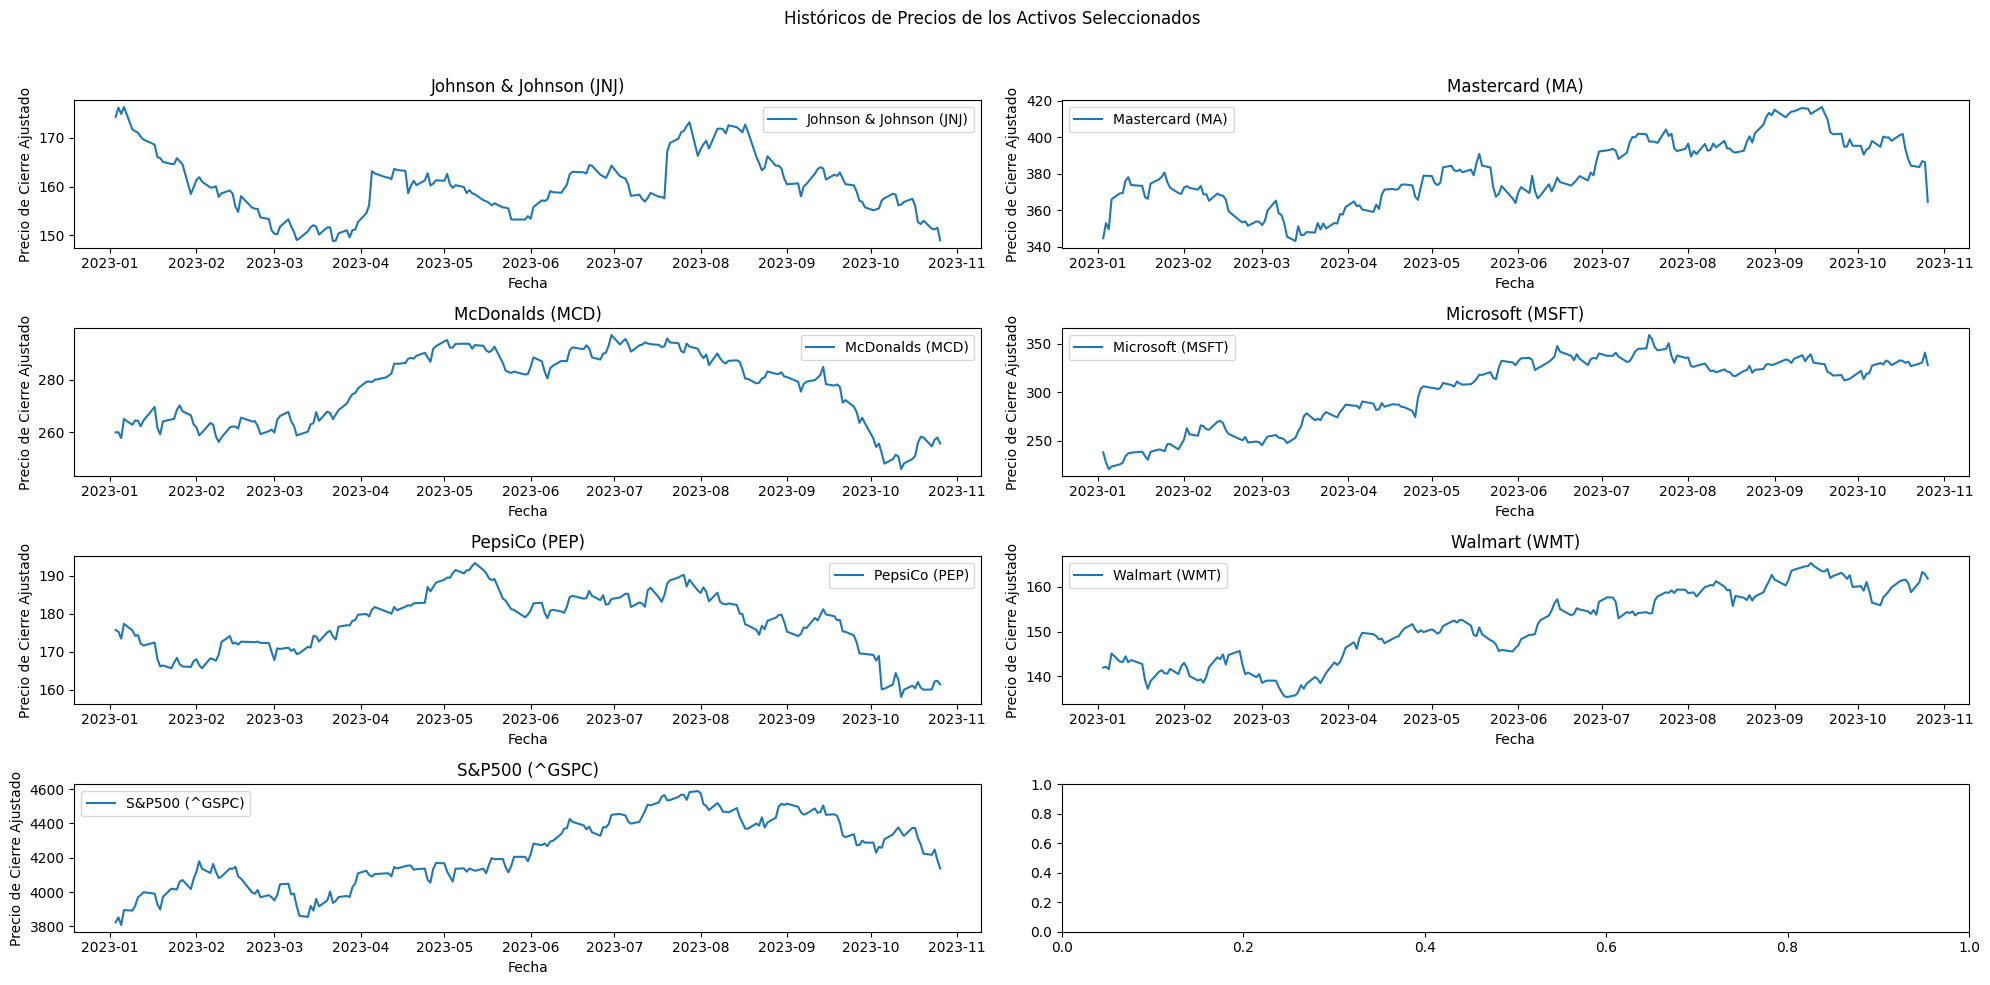

In [38]:


# Crear subgráficos
fig, axs = plt.subplots(4, 2, figsize=(20, 10))
fig.suptitle('Históricos de Precios de los Activos Seleccionados ')

# Iterar sobre los activos y sus nombres para graficar
for i, (activo, nombre) in enumerate(zip(data.columns, nombres_activos)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(data.index, data[activo], label=nombre)
    axs[row, col].set_title(nombre)
    axs[row, col].set_xlabel('Fecha')
    axs[row, col].set_ylabel('Precio de Cierre Ajustado')
    axs[row, col].legend()

# Ajustar el espaciado entre subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

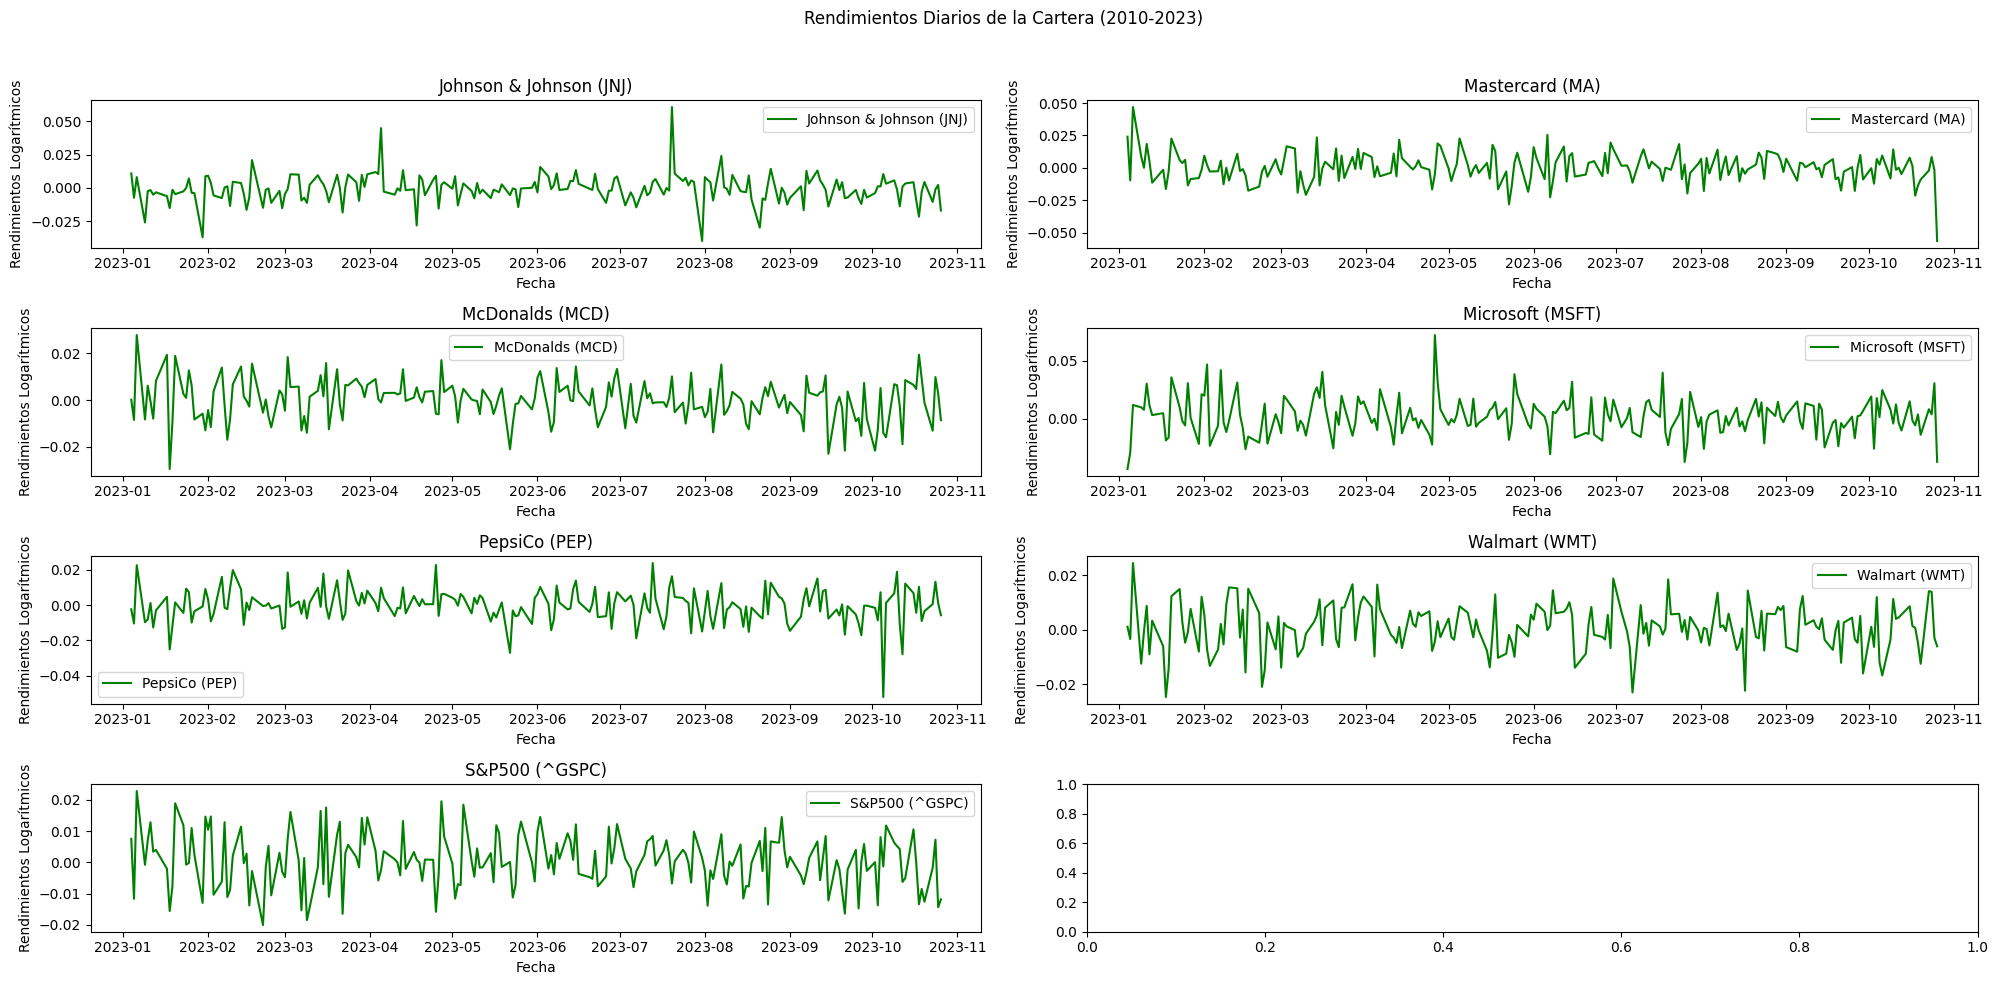

In [39]:

# Crear subgráficos
fig, axs = plt.subplots(4, 2, figsize=(20, 10))
fig.suptitle('Rendimientos Diarios de la Cartera (2010-2023)')

# Iterar sobre los activos y sus nombres para graficar
for i, (activo, nombre) in enumerate(zip(log_returns.columns, nombres_activos)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(log_returns.index, log_returns[activo], label=nombre, color='green')
    axs[row, col].set_title(nombre)
    axs[row, col].set_xlabel('Fecha')
    axs[row, col].set_ylabel('Rendimientos Logarítmicos')
    axs[row, col].legend()

# Ajustar el espaciado entre subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

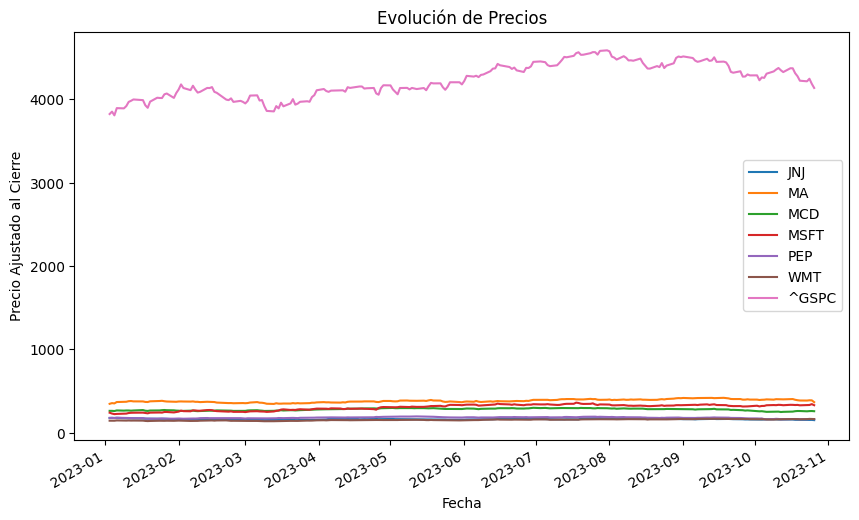

In [40]:
data.plot(figsize=(10, 6))
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado al Cierre')
plt.title('Evolución de Precios')
plt.show()




# 4. Selección de Características:

Identifica las variables (indicadores) que son más relevantes para tu estrategia de trading. Esto puede hacerse mediante técnicas como el análisis de correlación o algoritmos de selección de características.



In [16]:
import plotly.figure_factory as ff

# Calcular correlaciones
correlation_matrix = data.corr()
correlation_matrix

,JNJ,MA,MCD,MSFT,PEP,WMT,^GSPC
JNJ,1.000000,0.367123,0.323957,0.045986,0.316844,0.297802,0.341467
MA,0.367123,1.000000,0.283164,0.707434,0.135852,0.867836,0.852300
MCD,0.323957,0.283164,1.000000,0.532481,0.933229,0.319161,0.497305
MSFT,0.045986,0.707434,0.532481,1.000000,0.387601,0.830365,0.875956
PEP,0.316844,0.135852,0.933229,0.387601,1.000000,0.190364,0.325262
WMT,0.297802,0.867836,0.319161,0.830365,0.190364,1.000000,0.849183
^GSPC,0.341467,0.852300,0.497305,0.875956,0.325262,0.849183,1.000000


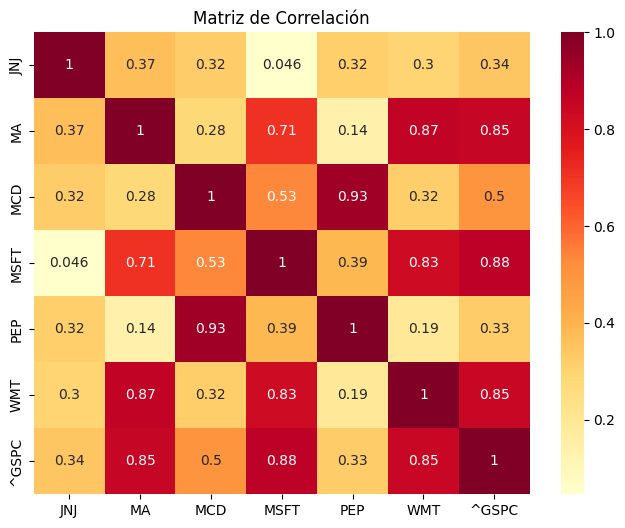

In [47]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Matriz de Correlación')
plt.show()





# 5. Modelado Predictivo:

Utiliza algoritmos de machine learning para construir modelos que pronostiquen los movimientos futuros del mercado. Puedes emplear técnicas como regresión, árboles de decisión, Support Vector Machines, etc.




# 6. Evaluación del Modelo:

Utiliza métricas de evaluación adecuadas como el error cuadrático medio (MSE), el coeficiente de determinación (R²), o el rendimiento en el conjunto de prueba para evaluar el rendimiento de tu modelo.




# 7. Optimización y Ajuste del Modelo:

Dependiendo de los resultados, es posible que necesites ajustar los hiperparámetros de tu modelo o incluso probar diferentes algoritmos.




# 8. Backtesting:

Utiliza tus modelos para hacer simulaciones retrospectivas y verifica cómo habrían funcionado en el pasado. Esto te ayudará a evaluar si tu estrategia es rentable.




# 9. Implementación y Monitoreo en Tiempo Real:

Una vez que estés satisfecho con tu modelo, puedes implementarlo en una plataforma de trading en tiempo real. Asegúrate de monitorear continuamente el rendimiento del modelo y estar preparado para ajustar tu estrategia según sea necesario.




# 10. Gestión de Riesgos:

Incluso con modelos sofisticados, es importante tener en cuenta la gestión de riesgos. Define límites de pérdida y asegúrate de no invertir más de lo que estás dispuesto a perder.





Es importante recordar que el trading siempre implica riesgos, y ningún modelo o estrategia garantiza ganancias. La formación continua y la adaptación son clave para el éxito a largo plazo en el trading.